In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

  Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]
--------------------------------------
      Item_Identifier  Item_Weight  ...  Outlet_Type  Item_Outlet_Sales
0               False        False  ...        False              False
1               False        False  ...        False              False
2               False        False  ...        False              False
3               False        False  ...        False              False
4               False        False  ...        False              False
5               False        False  ...        False          

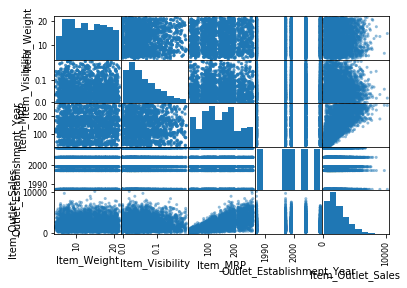

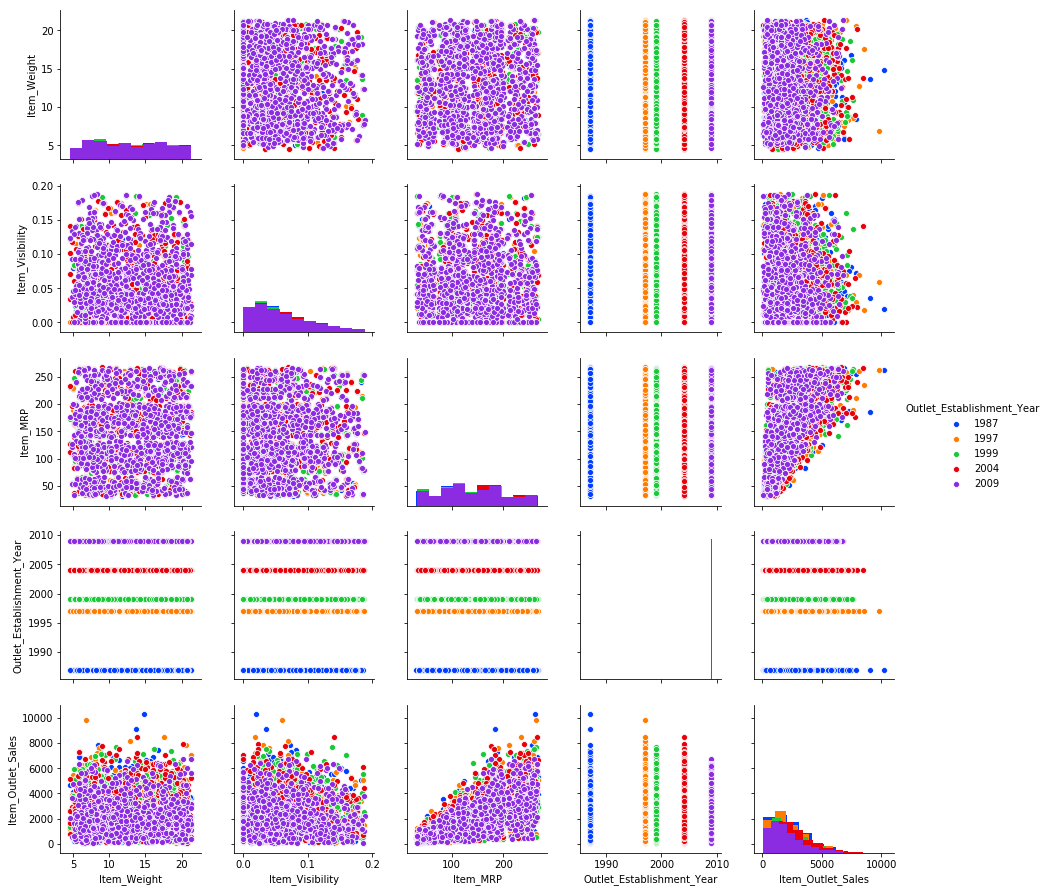

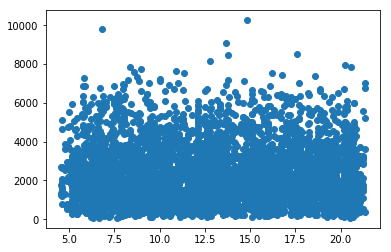

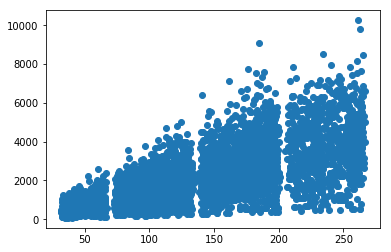

In [28]:
# Big Mart Sales 데이터셋을 이용한 회귀분석

# 상품 item 의 특징(weight, fatcontent, type, mrp)
# 매장 outlet 의 특징(year, size, location, type)에 
# 따라 상품판매량을 예측함
# => 어떤 시기에 어떤 상품이 잘 팔릴지
# => 어떻게 상품을 배치해야 잘 팔릴지 고민
# ==> 상점의 위치, 물건보유여부, 상점의 크기, 
#     세일여부, 홍보, 상점내 상품 위치 등이 
#     매출에 어떤 영향을 미치는지 파악해 봄


# 데이터 읽어오기
bigmart = pd.read_csv('bigmartsales1.txt')
print(bigmart.head())

print('--------------------------------------')
#bigmart.info()
#bigmart.describe()



# 결측치 조사 및 처리 1 - 제거
print(bigmart.isnull())
print('--------------------------------------')
print(bigmart.isnull().sum())
print('--------------------------------------')
bigmart1 = bigmart.dropna()
print('--------------------------------------')
bigmart1.isnull().sum()
print(bigmart.isnull().sum())


# 산점도
from pandas.plotting import scatter_matrix

scatter_matrix(bigmart1)
plt.show()


sns.pairplot(bigmart1, diag_kind='hist', 
             hue='Outlet_Establishment_Year', palette='bright')
# palette 다른값 = pastel, deep, dark, colorblind
plt.show()



# 산점도 - 상품무게별 판매량
plt.scatter(bigmart1['Item_Weight'], bigmart1['Item_Outlet_Sales'])
plt.show()



# 산점도 - 상품가격MRP별 판매량
plt.scatter(bigmart1['Item_MRP'], bigmart1['Item_Outlet_Sales'])
plt.show()

0           Dairy
1     Soft Drinks
2            Meat
4       Household
5    Baking Goods
Name: Item_Type2, dtype: object
------------------------
0           Dairy
1     Soft Drinks
2            Meat
4       Household
5    Baking Goods
Name: Item_Type2, dtype: category
Categories (16, object): [Baking Goods, Breads, Breakfast, Canned, ..., Seafood, Snack Foods, Soft Drinks,
                          Starchy Foods]
------------------------
0     4
1    14
2    10
4     9
5     0
Name: Item_Type2, dtype: int8
회귀계수 [[10.72210956]] [2192.71072812]
R^2 0.0009291921860823393
MSE 2196583.871689757


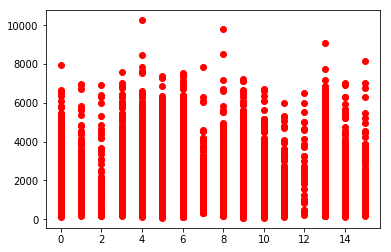

In [0]:
# 선형회귀 모델 1 : 상품종류별 판매량
bigmart1['Item_Type'].value_counts()


# 레이블 인코딩
bigmart1['Item_Type2'] = bigmart1['Item_Type']


print(bigmart1['Item_Type2'].head())
print('------------------------')

bigmart1['Item_Type2'] = pd.Categorical(bigmart1['Item_Type2']) # 여기까지는 아직 bridge

print(bigmart1['Item_Type2'].head())

print('------------------------')

bigmart1['Item_Type2'] = bigmart1['Item_Type2'].cat.codes # 레이블링 완료

print(bigmart1['Item_Type2'].head())


X = bigmart1['Item_Type2']

# 차원 변환
X = np.array(X).reshape(-1, 1)
y = np.array(bigmart1['Item_Outlet_Sales']).reshape(-1, 1)

# 학습/평가 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041500) 

# 선형회귀 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 평가 및 회귀계수 확인
print('회귀계수', lr.coef_, lr.intercept_)
# [10.72210956]] [2192.71072812]

print('R^2', r2_score(y_test, pred))
# 0.0009291921860823393

print('MSE', mean_squared_error(y_test, pred))
# 2196583.871689757


# 분석 결과 시각화
plt.plot(X, y, 'ro')
plt.show()



0    249.8092
1     48.2692
2    141.6180
4     53.8614
5     51.4008
Name: Item_MRP, dtype: float64
-------------
[[249.8092]
 [ 48.2692]
 [141.618 ]
 ...
 [ 85.1224]
 [103.1332]
 [ 75.467 ]]
회귀계수 [[16.26786505]] [-34.97980898]
R^2 0.43400332741525227
MSE 1288947.7492078743


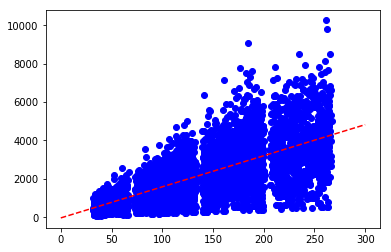

In [0]:
# 선형회귀 모델 2 : 상품가격별 판매량
# np.array(X).reshape(-1, 1)대신에 추출할컬럼[:, np.newaxis] 로 사용가능

X = bigmart1['Item_MRP'][:, np.newaxis]


print(bigmart1['Item_MRP'].head())
print('-------------')
print(X)

y = bigmart1['Item_Outlet_Sales'][:, np.newaxis]

X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041515) 

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('회귀계수', lr.coef_, lr.intercept_)
# [16.26786505]] [-34.97980898]

print('R^2', r2_score(y_test, pred))
# 0.43400332741525227

print('MSE', mean_squared_error(y_test, pred))
# 1288947.7492078743


x = np.linspace(0, 300, 300)
plt.plot(X, y, 'bo')
plt.plot(x, 16.18*x - 31.93, 'r--')

plt.show()

In [0]:
# 선형회귀 모델 3 : 아웃렛규모별 판매량

bigmart1['Outlet_Size2'] = pd.Categorical(bigmart1['Outlet_Size'])

bigmart1['Outlet_Size2'] = bigmart1['Outlet_Size2'].cat.codes

X = bigmart1['Outlet_Size2'][:, np.newaxis]


X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041525) 

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('회귀계수', lr.coef_, lr.intercept_)
# [31.62305623]] [2211.28055569]

print('R^2', r2_score(y_test, pred))
# -0.001999853668084528

print('MSE', mean_squared_error(y_test, pred))
# 2382795.136549944


x = np.linspace(0, 300, 300)
plt.plot(X, y, 'bo')
plt.plot(x, 16.18*x - 31.93, 'r--')

plt.show()



In [0]:
# 선형회귀 모델 4 : 지역별 판매량

bigmart1['Outlet_Location_Type2'] = \
pd.Categorical(bigmart1['Outlet_Location_Type'])

bigmart1['Outlet_Location_Type2'] = \
bigmart1['Outlet_Location_Type2'].cat.codes


X = bigmart1['Outlet_Location_Type2'][:, np.newaxis]


X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041525) 

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('회귀계수', lr.coef_, lr.intercept_)
# [-71.72355326]] [2320.52573585]

print('R^2', r2_score(y_test, pred))
# 0.0003980006296326888

print('MSE', mean_squared_error(y_test, pred))
# 2377092.944540794


x = np.linspace(0, 300, 300)
plt.plot(X, y, 'bo')
plt.plot(x, 16.18*x - 31.93, 'r--')

plt.show()




In [0]:
# 선형회귀 모델 5 : 아웃렛유형별 판매량

bigmart1['Outlet_Type2'] = \
pd.Categorical(bigmart1['Outlet_Type'])

bigmart1['Outlet_Type2'] = \
bigmart1['Outlet_Type2'].cat.codes


X = bigmart1['Outlet_Type2'][:, np.newaxis]


X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041525) 

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('회귀계수', lr.coef_, lr.intercept_)
# [-365.48954517]] [2320.94414517]

print('R^2', r2_score(y_test, pred))
# 0.0019116612329425076

print('MSE', mean_squared_error(y_test, pred))
# 2373493.3999792347


x = np.linspace(0, 300, 300)
plt.plot(X, y, 'bo')
plt.plot(x, 16.18*x - 31.93, 'r--')

plt.show()




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type2,Outlet_Size2,Outlet_Location_Type2,Outlet_Type2
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Dairy,1,0,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Soft Drinks,1,2,1
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Meat,1,0,0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Household,0,2,0
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Baking Goods,1,2,1
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Snack Foods,0,2,0
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,Fruits and Vegetables,1,0,0
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,Dairy,2,0,0
12,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646,Fruits and Vegetables,1,0,0
13,FDS46,17.600,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076,Snack Foods,2,0,0


회귀계수 [[  -5.1425529    -0.40157735   14.55319089 -105.89954289   16.19554584]] [22.13914001]
R^2 0.4463858241471683
MSE 1316516.3257441004
------------
------------


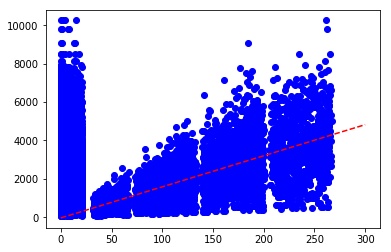

In [0]:
# 선형회귀 모델 6 : 상품특성에 따른 판매량
# Item_Identifier 를 제외한 나머지 Item_ 선택해서 분석 실시

bigmart1['Item_Fat_Content2'] = \
pd.Categorical(bigmart1['Item_Fat_Content'])

bigmart1['Item_Fat_Content2'] = \
bigmart1['Item_Fat_Content2'].cat.codes


X = bigmart1.loc[:, ['Item_Weight', 'Item_Type2', 
                     'Item_Fat_Content2', 'Item_Visibility', 'Item_MRP']]


X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041525) 

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('회귀계수', lr.coef_, lr.intercept_)
# [  -5.1425529    -0.40157735   14.55319089 -105.89954289   16.19554584]] [22.13914001]

print('R^2', r2_score(y_test, pred))
# 0.4463858241471683

print('MSE', mean_squared_error(y_test, pred))
# 1316516.3257441004


x = np.linspace(0, 300, 300)
print('------------')
#print(x)
print('------------')
plt.plot(X, y, 'bo')
plt.plot(x, 16.18*x - 31.93, 'r--')

plt.show()



회귀계수 [[  24.3644444   -59.98883826   50.94032461 -703.33586421]] [-46290.76942787]
R^2 0.003198232211456764
MSE 2263142.9595467257


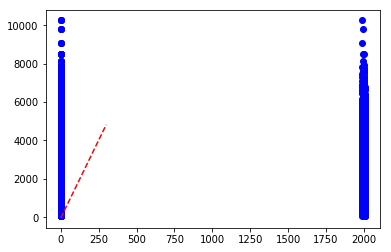

In [0]:
# 선형회귀 모델 7 : 아웃렛특성에 따른 판매량
# Outlet_Identifier	를 제외한 나머지 Outlet_ 선택해서 분석 실시

X = bigmart1.loc[:, ['Outlet_Establishment_Year', 'Outlet_Size2', 
                     'Outlet_Location_Type2', 'Outlet_Type2']]

X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041600) 

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('회귀계수', lr.coef_, lr.intercept_)
# [  24.3644444   -59.98883826   50.94032461 -703.33586421]] [-46290.76942787]

print('R^2', r2_score(y_test, pred))
# 0.003198232211456764

print('MSE', mean_squared_error(y_test, pred))
# 2263142.9595467257


x = np.linspace(0, 300, 300)
plt.plot(X, y, 'bo')
plt.plot(x, 16.18*x - 31.93, 'r--')

plt.show()



회귀계수 [[ 1.61233421e-01 -3.48442691e+02  1.62944281e+01  1.92298446e+01
   5.92767756e-02 -7.26742657e+01  2.00009911e+01 -5.93103395e+02
  -8.08047501e-01]] [-38279.61860515]
R^2 0.4740576186989168
MSE 1194101.8122484777


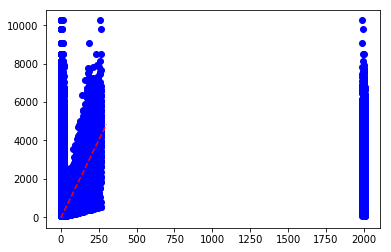

In [0]:
# 선형회귀 모델 8 : 상품/아웃렛특성에 따른 판매량
# ~_Identifier 를 제외한 나머지 변수들을 선택해서 분석 실시

bigmart1.columns

X = bigmart1.iloc[:, [1, 3, 5, 7, 12, 13, 14, 15, 16]]


X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041600) 

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('회귀계수', lr.coef_, lr.intercept_)

print('R^2', r2_score(y_test, pred))
# 0.4740576186989168

print('MSE', mean_squared_error(y_test, pred))
# 1194101.8122484777


x = np.linspace(0, 300, 300)
plt.plot(X, y, 'bo')
plt.plot(x, 16.18*x - 31.93, 'r--')

plt.show()


# => 많은 독립변수가 있더라도 회귀분석에 
# 도움이 되는 변수가 아니면 별다른 효용이 없음


In [0]:
## 리지, 라쏘 회귀 - 과적합을 피하기 위함

# 가중치에 계약조건을 설정해서 회귀를 구하는 알고리즘
# 이를 통해 모델의 복잡도를 다소 낮춰 적당한 편향/분산을 통해
# 적절한 회귀모델을 구함

# 일반적인 회귀분석 : 회귀계수 추정량을 구함
# 잔차의 제곱합을 최소로 하는 최소제곱법 사용

# 실제 회귀모델은 단일변수가 아닌 다중변수가 많음

# 독립변수 증가 => 변수간 강한 상관관계 => 다중공선성 문제 발생
# => 최소제곱법을 이용한 회귀계수 추정량이 커짐 => 정확도 저하

# 따라서, 중요한 변수를 선정하고, 중요하지 않은 변수는 제외
# => 변수선택(feature selection)
# 중요하지 않은 변수에 해당하는 계수 절대값을 낮춤



## 라쏘회귀(L1 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0으로 설정
# 기울기를 완전히 줄여 특정 특성이 모델에 주는 영향을 제외시킴


## 리지회귀(L2 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수의 계수는 축소 => 0에 가깝게 설정
# 기울기를 다소 줄여 특정 특성이 모델에 주는 영향을 축소시킴


## 엘라스틱넷 회귀
# 라쏘회귀와 리지회귀의 제약을 합친 모형

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907041630)


In [0]:
## 리지회귀

lrR = Ridge()
lrR.fit(X_train, y_train)

print('훈련 정확도', lrR.score(X_train, y_train))
# 0.4687766793681785


# alpha : 특정 특성의 영향을 어느정도로 
#         제외시킬 것인지 그 비율을 지정하는 변수
# 값이 낮으면 모델 복잡도가 증가(특성수 증가)

# alpha = 0.01 : 모든 변수 사용
lrR = Ridge(alpha = 0.01)
lrR.fit(X_train, y_train)
print('훈련 정확도', lrR.score(X_train, y_train))   
# 0.4687778199291488
print('사용한 특성수', np.sum(lr.coef_ != 0))


# alpha = 0.1
lrR = Ridge(alpha = 0.1)
lrR.fit(X_train, y_train)
print('훈련 정확도', lrR.score(X_train, y_train))
# 0.46877780647073347
print('사용한 특성수', np.sum(lr.coef_ != 0))


# alpha = 0.9
lrR = Ridge(alpha = 0.9)
lrR.fit(X_train, y_train)
print('훈련 정확도', lrR.score(X_train, y_train))
# 0.46877687927913025
print('사용한 특성수', np.sum(lr.coef_ != 0))



훈련 정확도 0.4687766793681785
훈련 정확도 0.4687778199291488
사용한 특성수 9
훈련 정확도 0.46877780647073347
사용한 특성수 9
훈련 정확도 0.46877687927913025
사용한 특성수 9


In [0]:
## 라쏘회귀

lrL = Lasso()
lrL.fit(X_train, y_train)

print('훈련 정확도', lrL.score(X_train, y_train))
# 0.4686961714349802

# alpha = 0.01 : 모든 변수 사용
lrL = Lasso(alpha = 0.01)
lrL.fit(X_train, y_train)
print('훈련 정확도', lrL.score(X_train, y_train))   
# 0.4687777937863845
print('사용한 특성수', np.sum(lr.coef_ != 0)) #불린 형태로 바꾼 뒤 sum 하면 1값 개수 나옴 ㅇㅇ


# alpha = 0.1
lrL = Lasso(alpha = 0.1)
lrL.fit(X_train, y_train)
print('훈련 정확도', lrL.score(X_train, y_train))
# 0.4687751919496239
print('사용한 특성수', np.sum(lr.coef_ != 0))


# alpha = 0.9
lrL = Lasso(alpha = 0.9)
lrL.fit(X_train, y_train)
print('훈련 정확도', lrL.score(X_train, y_train))
# 0.4687025311185514
print('사용한 특성수', np.sum(lr.coef_ != 0))

print(lr.coef_)

훈련 정확도 0.4670493339355404
훈련 정확도 0.4670604785946304
사용한 특성수 5
훈련 정확도 0.46705816017767376
사용한 특성수 5
훈련 정확도 0.46704954978220825
사용한 특성수 5
[[  -5.1425529    -0.40157735   14.55319089 -105.89954289   16.19554584]]
